In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym, rec_gym
import numpy as np
from rec_gym.envs import PrimEnv1

In [3]:
import gin

In [4]:
gin.parse_config("""
PrimEnv1.n_items = 100
PrimEnv1.n_users = 10
PrimEnv1.n_rec   = 4
PrimEnv1.embedding_dimension = 2
PrimEnv1.cluster_var = 16
PrimEnv1.in_cluster_var = 4
PrimEnv1.user_change_prob = 0.05
PrimEnv1.reward_noise = 0.3
PrimEnv1.user_init_sigma = 4
PrimEnv1.user_ar_coef = 1
PrimEnv1.user_drift_sigma = 0
PrimEnv1.seed = 53
PrimEnv1.user_type = 'drifting'
""")

In [5]:
env = gym.make('prim-gym-v1')

In [6]:

init_observation = env.reset()
init_users, init_items = init_observation

item_list = list(init_items.values())

rec = [i.id for i in item_list[:4]]

observation, reward, done, info = env.step(rec)

users, items = observation
print(f"Action: {rec} - Observation: ({users}, {items}) - Reward: {reward}")

Action: [0, 1, 2, 3] - Observation: (<rec_gym.envs.prim_env_v1.User object at 0x7f317147e400>, {0: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d630>, 1: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d6a0>, 2: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d828>, 3: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d7f0>, 4: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d748>, 5: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d860>, 6: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d898>, 7: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d8d0>, 8: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d908>, 9: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d940>, 10: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d978>, 11: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d9b0>, 12: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056d9e8>, 13: <rec_gym.envs.prim_env_v1.Item object at 0x7f317056da20>, 14: <rec_gym.envs.prim_env_v1.Item object at 0

In [7]:
env.recommendations

defaultdict(list, {4: [[0, 1, 2, 3]]})

In [8]:
env.ps

defaultdict(list,
            {4: [[3.4383783850741673e-08,
               0.0003509309913883173,
               6.196572684136255e-05,
               6.537084299912441e-06]]})

In [9]:
env.rewards

defaultdict(list, {4: [[0, 0, 0, 0]]})

In [10]:
img = env.render(mode='rgb_array')

In [11]:
import matplotlib.pylab as plt
%matplotlib inline

In [12]:
img.shape

(500, 500, 3)

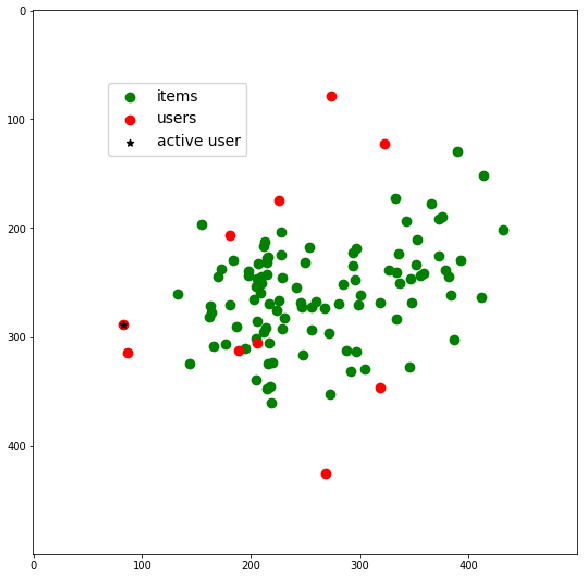

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [14]:
#record sessions
from tqdm import tqdm_notebook

import gym.wrappers
env = gym.make("prim-gym-v1")
env = gym.wrappers.Monitor(env,directory="logs/videos",force=True)

user, items = env.reset()

for i in tqdm_notebook(range(1000)):
    

    item_list = list(items.values())

    rec = [i.id for i in np.random.choice(item_list, env.unwrapped.n_rec)]
    
    observation, reward, done, info = env.step(rec)
    
    user, items = observation
    
env.close()


In [63]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=1000), Output()), _…

In [15]:
!ls logs/videos/videos/

openaigym.episode_batch.2.21846.stats.json
openaigym.manifest.2.21846.manifest.json
openaigym.video.2.21846.video000000.meta.json
openaigym.video.2.21846.video000000.mp4


In [16]:
#show video
from IPython.display import HTML
import os

video_names = list(filter(lambda s:s.endswith(".mp4"),os.listdir("logs/videos/videos/")))

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format("logs/videos/videos/"+video_names[-1]))

# Lines are last 5 recommendations  
# reward :yellow - 1, black - 0 